# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

In [3]:
# Reading the data
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# Renaming the columns
data.columns = ['id', 'date', 'element', 'temperature']

In [4]:
data.head()

,id,date,element,temperature
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
# Converting temperature tu celsius
data['temperature'] = data['temperature']*0.1

# Converting to pd datetime and getting year. month and day
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Removing february 29
data = data[(data['month']!=2) | (data['day'] != 29)]

In [6]:
# Obtaining minimum and maximum temperature for each day of the year
min_temp = (data[(data['year'] >= 2005) & (data['year'] < 2015) & (data['element'] == 'TMIN')]
            .groupby(['month', 'day'])['temperature'].min())

max_temp = (data[(data['year'] >= 2005) & (data['year'] < 2015) & (data['element'] == 'TMAX')]
            .groupby(['month', 'day'])['temperature'].max())

In [7]:
# Merge min and max data to the original df
data = (data.merge(max_temp.reset_index(drop=False).rename(columns={'temperature':'max_temp'}), on=['month', 'day'], how='left'))
data = (data.merge(min_temp.reset_index(drop=False).rename(columns={'temperature':'min_temp'}), on=['month', 'day'], how='left'))

In [8]:
data.head()

,id,date,element,temperature,year,month,day,max_temp,min_temp
0,USW00094889,2014-11-12,TMAX,2.2,2014,11,12,21.1,-9.4
1,USC00208972,2009-04-29,TMIN,5.6,2009,4,29,27.2,-5.0
2,USC00200032,2008-05-26,TMAX,27.8,2008,5,26,33.3,-1.0
3,USC00205563,2005-11-11,TMAX,13.9,2005,11,11,22.2,-7.7
4,USC00200230,2014-02-27,TMAX,-10.6,2014,2,27,12.2,-23.8


In [9]:
# Getting record breaking data from year 2015
record_max2015 = data[(data['year'] == 2015) & (data['temperature'] > data['max_temp'])]
record_min2015 = data[(data['year'] == 2015) & (data['temperature'] < data['min_temp'])]

In [65]:
# Creating a date vector to plot 2015 record data
date_range = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

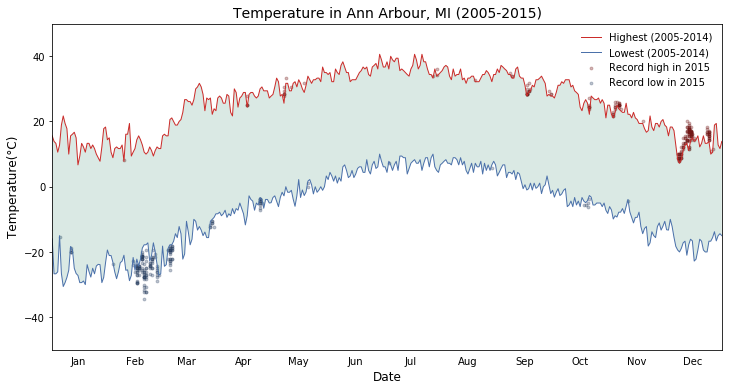

In [67]:
# Creating the plot
plt.figure(figsize=[12, 6])

# Plotting the max and min lines
plt.plot(date_range, max_temp, color='#cb2c2a', linewidth=1) # Max in red.
plt.plot(date_range, min_temp, color='#4b71aa', linewidth=1) # Min in blue.

# Plotting the record data from 2015
plt.scatter(record_max2015['date'].values, record_max2015['temperature'].values, color='#721817', s=8, alpha=0.3)
plt.scatter(record_min2015['date'].values, record_min2015['temperature'].values, color='#2b4162', s=8, alpha=0.3)

# Set axis limits.
ax = plt.gca()
ax.axis(['2015-01-01','2015-12-31',-50,50])

# Set axis names and title:
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature(°C)', fontsize=12)
plt.title('Temperature in Ann Arbour, MI (2005-2015)', fontsize=14)

# Create legend and title
plt.legend(['Highest (2005-2014)','Lowest (2005-2014)','Record high in 2015','Record low in 2015'],
           frameon=False)

# Fill colour between highs and lows:
ax.fill_between(date_index, max_temp, min_temp, facecolor='#0b6e4f', alpha=0.15)

# Set a major ticks at the 15th day of each month
ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday=15))

# Set ticks label in the middle
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

# Centering tick label and assigning a fiex markersize value
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')